26029
0
0.1
-0.1
(160, 320, 3)


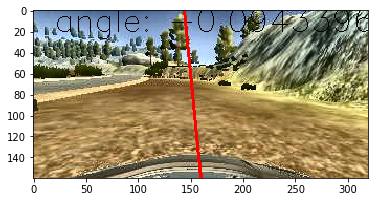

(160, 320, 3)


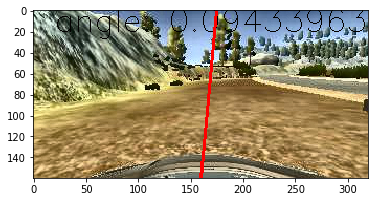

(160, 320, 3)


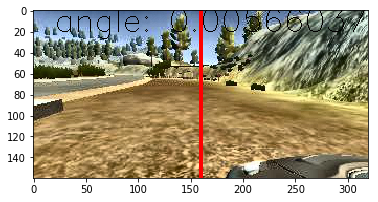

(160, 320, 3)


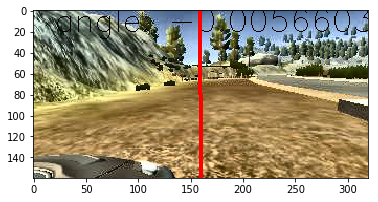

(160, 320, 3)


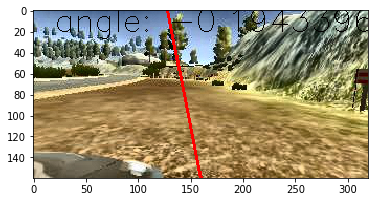

(160, 320, 3)


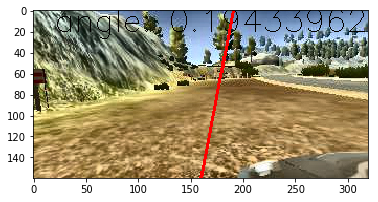

In [90]:
#This notebook is only for analysing the data and test various methods to see that the augumutation is correct

import csv
import numpy as np
import cv2
import sklearn
from sklearn.model_selection import train_test_split

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def print_img(img,angle):
    shape=np.shape(img)
    print(shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#cv2 is bgr while plotlib do rgb
    cv2.putText(img, 'angle: ' + str(angle),(20,20),cv2.FONT_HERSHEY_SIMPLEX,1,2)
    
    #cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
    cv2.line(img,(int(shape[1]/2),int(shape[0])),(int((shape[1]/2)+angle*shape[0]),0),(255,0,0),thickness=2)
    plt.imshow(img, cmap="gray")
    plt.show()
#use pandas instead?

#if we rotate image, rotate steering at same?
def augument_image(img,angle):
    
    shape=np.shape(image)
    zoomx=np.random.uniform(0.4,1.4)
    zoomxy=np.random.uniform(-0.1,0.1)
    zoomy=zoomx-zoomxy
    extrapixelsx=(shape[0]-shape[0]*zoomx)/2
    extrapixelsy=(shape[1]-shape[1]*zoomy)/2
    posx=extrapixelsx+np.random.uniform(-6,6)/(zoomx*2)
    posy=extrapixelsy+np.random.uniform(-6,6)/(zoomy*2)
    skewx=np.random.uniform(-0.2,0.2)
    skewy=np.random.uniform(-0.2,0.2)
    print(f"zoomx {zoomx},zoomy {zoomy},posx {posx}, posy {posy}, skewx {skewx}, skewy {skewy}")
    M = np.float32([[zoomx,skewx,posx],[skewy,zoomy,posy]])
    img = cv2.warpAffine(image,M,(shape[0],shape[1]), borderMode=cv2.BORDER_REPLICATE)
    return img, angle


def rgb_clahe(img):
    #https://stackoverflow.com/questions/24341114/simple-illumination-correction-in-images-opencv-c/24341809#24341809
    l, a, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    return cv2.merge((cl, a, b))


#########################
#main code:

all_images=True
with open('data/driving_log.csv', 'r') as file:
    samples = [line for line in csv.reader(file, delimiter=',')][1:]
if all_images:
    with open('data/driving_log2.csv', 'r') as file:
        samples2 = [line for line in csv.reader(file, delimiter=',')][1:]

    with open('data/drivinglog_map2.csv', 'r') as file:
        samples3 = [line for line in csv.reader(file, delimiter=',')][1:]

    with open('data/drivinglog_dirt.csv', 'r') as file:
        samples4 = [line for line in csv.reader(file, delimiter=',')][1:]

    with open('data/driving_log_left.csv', 'r') as file:
        samples5 = [line for line in csv.reader(file, delimiter=',')][1:]

    with open('data/driving_log_right.csv', 'r') as file:
        samples6 = [line for line in csv.reader(file, delimiter=',')][1:]
    samples=np.concatenate([samples,samples2,samples3,samples4,samples5,samples6])

 #take one random
print(len(samples))
line=samples[np.random.randint(len(samples))]

#for... if we want to show many samples at the same time


all_samples=[]

#create 6 samples from this sample (flip direction including the side cameras)
for camera in range(3):
    steering = float(line[3])
    image_file = line[camera].split('/')[-1]
    image_path = 'data/IMG/' + image_file
    correction = 0 if camera == 0 else (0.1 if camera == 1 else -0.1)
    steering += correction
    print(correction)
    all_samples.append([image_path,steering,False])
    all_samples.append([image_path,-steering,True])
    
    
for batch_sample in all_samples:
    center_path = batch_sample[0]
    image = cv2.cvtColor(cv2.imread(center_path), cv2.COLOR_BGR2LAB)#YUV)
    image = rgb_clahe(image)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)  # YUV)
    if batch_sample[2]:  # flip image and steering, so we have 50/50 for both left and right
        image = cv2.flip(image, 1)
        
    print_img(image,batch_sample[1])